In [ ]:
# Name: Manoj Kumar Jaiswal
# Email: mkjaiswa@eng.ucsd.edu
# PID A53106952

## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [2]:
%pylab inline
import pandas as pd
#import seaborn as sns 
data_dir = "../Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [3]:
#!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

### Get the statistics from the Pickle File

In [4]:
import pickle
STAT,STAT_description=pickle.load(open('../Data/Weather/STAT.pickle','r'))

In [5]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [6]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [7]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '../Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
mean:44.531018 std:109.933072 low1000:-244.000000 low100:-244.000000 high100:239.000000 high1000:272.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
mean:113.582223 std:119.255224 low1000:-178.000000 low100:-178.000000 high100:339.000000 high1000:394.000000
           TMAX = Maximum temperature (tenths of degrees C)
mean:175.823101 std:123.742076 low1000:-122.000000 low100:-122.000000 high100:383.000000 high1000:428.000000
   	   SNOW = Snowfall (mm)
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:64.000000 high1000:203.000000
	   SNWD = Snow depth (mm)
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:483.000000 high1000:1448.000000
           PRCP = Precipitation (tenths of mm)
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:371.000000 high1000:864.000000


### Script for plotting yearly plots 

In [8]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7)):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-');
    # rotate and align the tick labels so they look better
    plt.gca().xaxis.set_major_formatter(DateFormatter('%b\n %y'))
    #plt.gca().xaxis.set_major_formatter( DateFormatter('%b') )
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low1000 and high1000
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

In [9]:
df_STAT  = pd.DataFrame(STAT)
df_STAT.head(2)

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
Cov,"[[4546.87141746, 866.420138489, 282.306519469,...","[[384.902261018, 65.2020101318, 29.5791141273,...","[[12844.1564096, 12650.4732373, 12470.7264297,...","[[7450.49627736, 6403.2855636, 5642.12312104, ...","[[7160.22888408, 5393.95578744, 4506.17730854,...","[[6804.99060863, 5215.01125602, 4417.55566078,..."
E,"[17025290.0, 15824468.0, 16452655.0, 15520404....","[2335810.0, 2330893.0, 2191089.0, 2109433.0, 2...","[18113756.0, 18814191.0, 19266949.0, 19608487....","[28225566.0, 27324556.0, 27166755.0, 27063731....","[-27444588.0, -28932323.0, -28810829.0, -28520...","[257501.0, -414808.0, -481071.0, -642582.0, -4..."


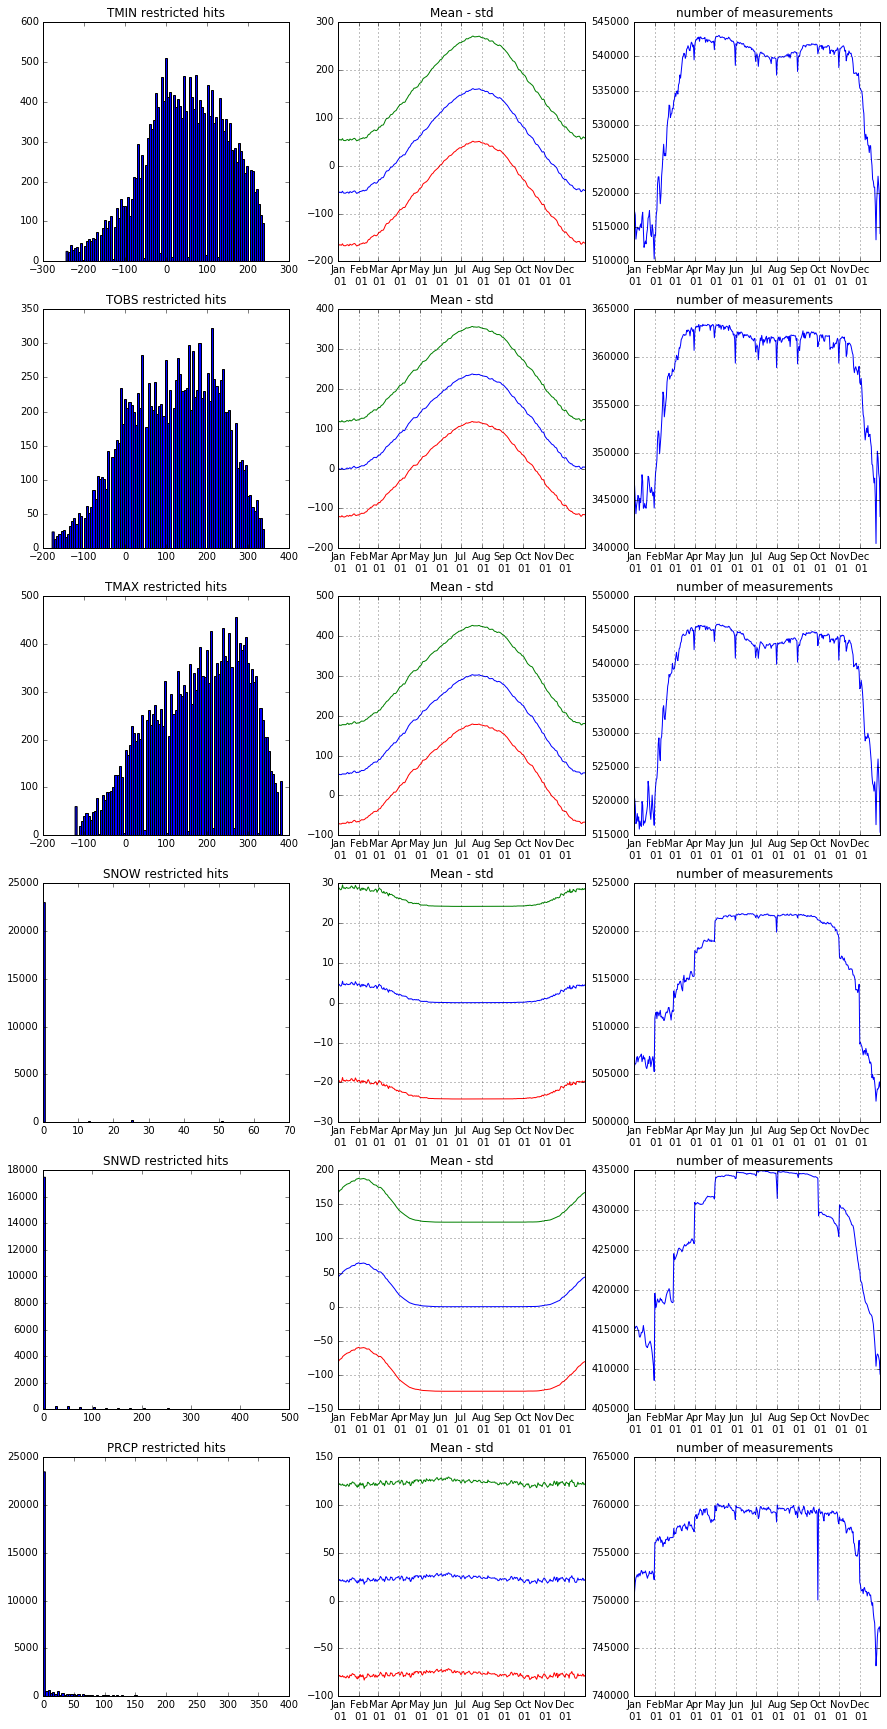

In [10]:
figure(figsize=(15,30))
offset=1

for meas in STAT.keys():
    
    ax1 = subplot(6,3,offset)
    offset+=1
    ## Your code for Histogram
    
    vals = STAT[meas]['SortedVals']
    vals = vals[(vals >=STAT[meas]['low100']) & (vals <= STAT[meas]['high100'])]
    plt.hist(vals, bins = 100, color='blue')
    plt.title(meas + ' restricted hits' )

    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std 
    YearlyPlots(STAT[meas]['Mean'], ttl = "Mean")
    YearlyPlots(STAT[meas]['Mean'] + STAT[meas]['std'], ttl = "Mean + std")
    YearlyPlots(STAT[meas]['Mean'] - STAT[meas]['std'], ttl = "Mean - std")
 
    subplot(6,3,offset)
    offset+=1
    
    # Your code for number of measurements
    YearlyPlots(STAT[meas]['NE'], ttl = "number of measurements ")
    

In [11]:
# Code imbeded in the notebook
# figure(figsize=(15,30))
# offset=1
# for meas in STAT.keys():
#     subplot(6,3,offset)
#     offset+=1
#     ## Your code for Histogram
#     subplot(6,3,offset)
#     offset+=1
#     ## Your code for mean and mean +- std
#     subplot(6,3,offset)
#     offset+=1
#     ## Your code for number of measurements

### Plot the Number of measurements recorded each day for TMAX

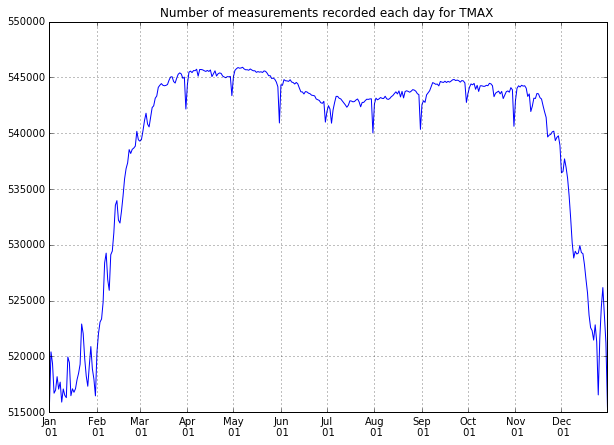

In [12]:
## Your code here

YearlyPlots(STAT['TMAX']['NE'], ttl = "Number of measurements recorded each day for TMAX ")

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


In [57]:
!ls ../../Data/Weather

STAT.pickle                 data-source.txt             ghcnd-stations.txt          ghcnd-version.txt           stations.pkl
SampleStations.pickle       ghcnd-readme.txt            ghcnd-stations_buffered.txt snwd_all_stations.pickle    tmax_all_stations.pickle


##### Can you figure out reason for lower counts.
lower counts could be because of not collecting data during end  of the month. Could be becaue of the data transfer / collection / maintainence. Other than last day data is very consistent.

The counts per day for SNWD is slightly different compared to TMAX
For TMAX the counts are low on last day of every month but very consistent for rest of the  month
In case of SNWD  counts are increasing  begining of the  month.
From May to october almost same number of measurements were taken.


## Intructor comments ##

Text only restates the facts, does not provide any explanation of evidence that the explanations are correct.


No extra credit points assigned.

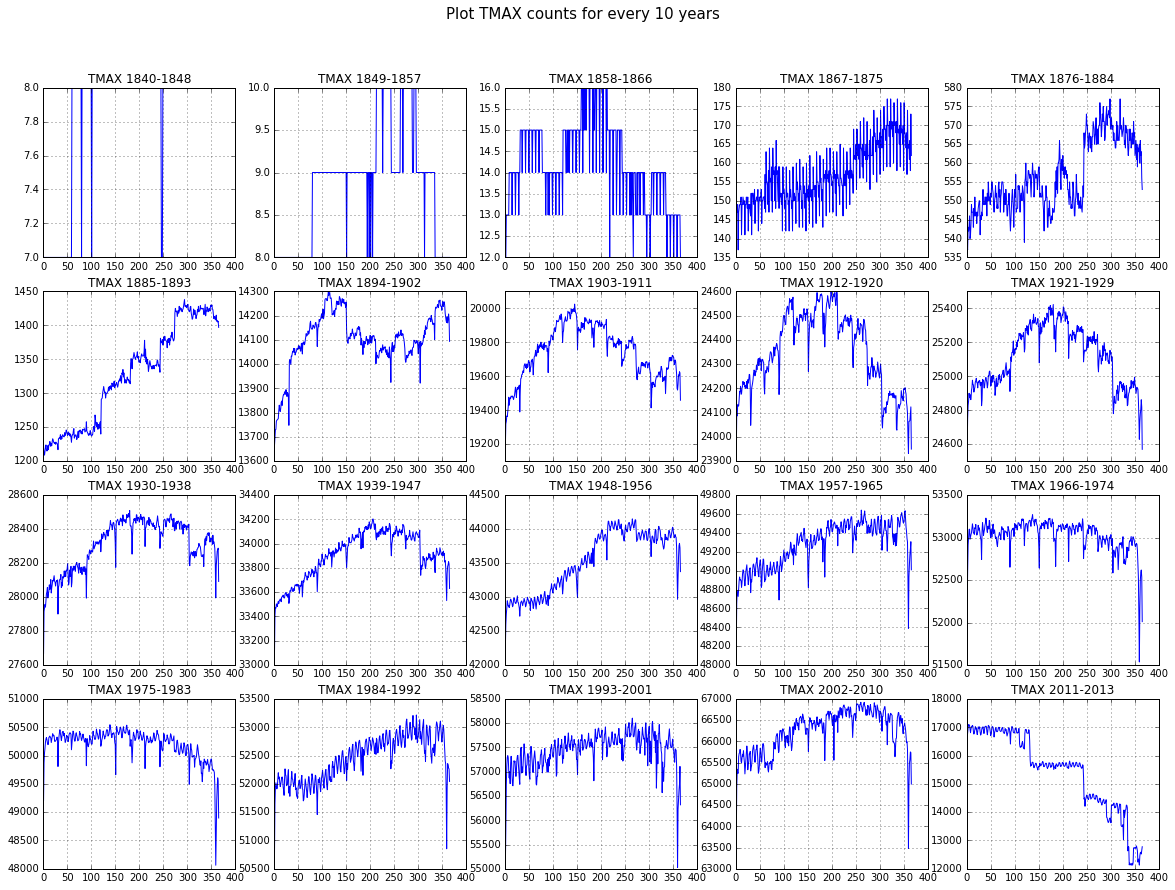

In [131]:
tmax_all_years = pickle.load(open('../../Data/Weather/tmax_all_years.pickle','r'))
tmax_year_df = pd.DataFrame({year:counts for year, counts in tmax_all_years}, index=range(1, 366)).T

num_columns = 5
num_rows = 4
# Plot the images
fig = plt.figure(figsize=(num_columns * 4, 3.5 * num_rows))
fig.suptitle("Plot TMAX counts for every 10 years", fontsize=15)
for i, j in enumerate(range(0, len(tmax_year_df), 9)):
    ax = fig.add_subplot(num_rows, num_columns, i + 1)
    start_index, end_index = (j, j + 8) if j + 8 <= len(tmax_year_df) - 1 else (j, len(tmax_year_df) - 1)
    ax.plot(tmax_year_df.columns,
            tmax_year_df.iloc[start_index:end_index, :].sum().values, c='b')
    start_year, end_year = str(int(tmax_year_df.index[start_index])), str(int(tmax_year_df.index[end_index]))
    ax.set(title="TMAX " + start_year + "-" + end_year)
    ax.grid()

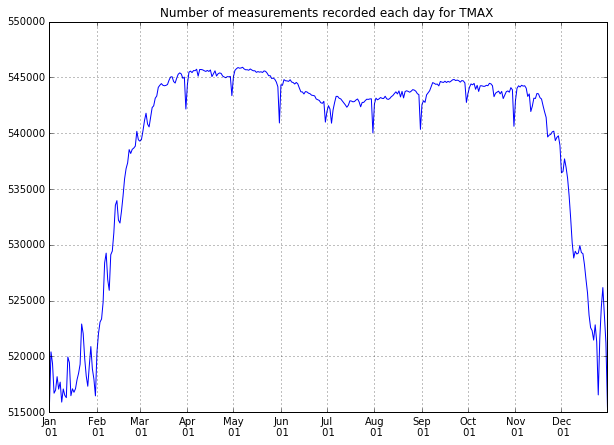

In [138]:
## Your code here

YearlyPlots(STAT['TMAX']['NE'], ttl = "Number of measurements recorded each day for TMAX ")

##### Can you Explain the counts per day for "SNWD" ?


For SNWD the counts increase on first of every month as the temperature increases.
From May to october almost same number of measurements were taken.
This pattern is quite possible because snow dept measurements could be difficult in few places during winter.
The count behavior is different in case of snow depth. From 1940s - 2000s the measurements are more in summer then in winter.



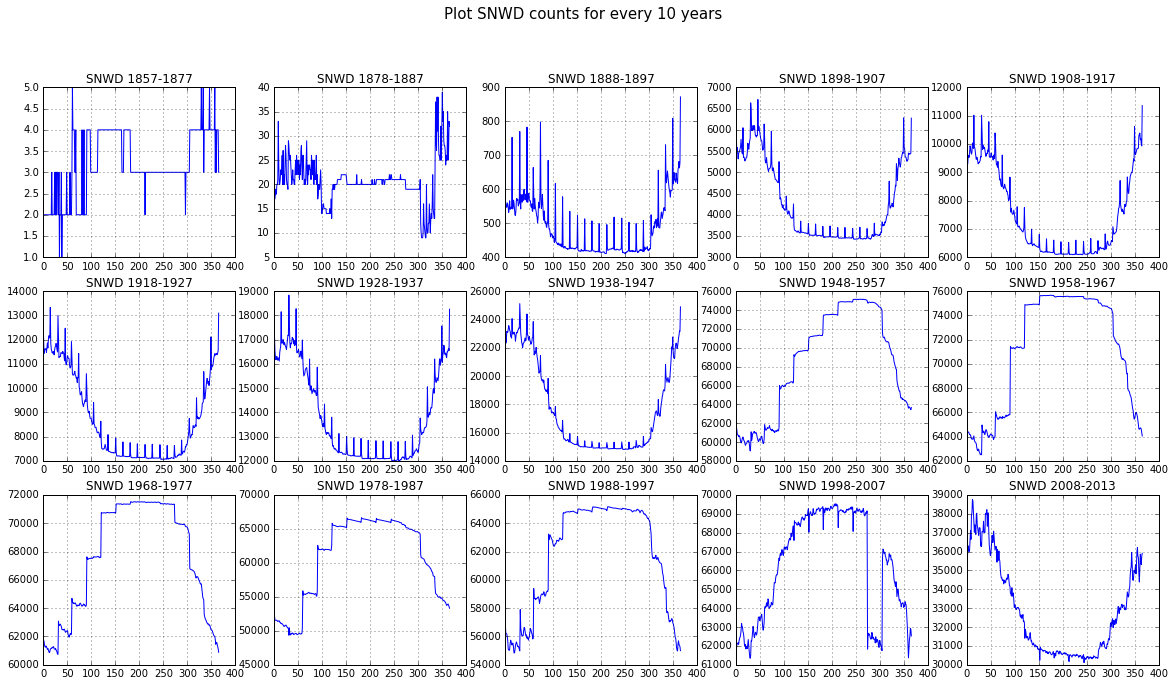

In [139]:
snwd_all_years = pickle.load(open('../../Data/Weather/snwd_all_years.pickle','r'))

snwd_year_df = pd.DataFrame({year:counts for year, counts in snwd_all_years}, index=range(1, 366)).T

num_columns = 5
num_rows = 4
# Plot the images
fig = plt.figure(figsize=(num_columns * 4, 3.5 * num_rows))
fig.suptitle("Plot SNWD counts for every 10 years", fontsize=15)
val_range = 10
for i, j in enumerate(range(0, len(snwd_year_df), val_range)):
    ax = fig.add_subplot(num_rows, num_columns, i + 1)
    start_index, end_index = (j, j + val_range - 1) if \
        j + val_range -1 <= len(snwd_year_df) - 1 else (j, len(snwd_year_df) - 1)
    ax.plot(snwd_year_df.columns,
            snwd_year_df.iloc[start_index:end_index, :].sum().values, c='b')
    start_year, end_year = str(int(snwd_year_df.index[start_index])), str(int(snwd_year_df.index[end_index]))
    ax.set(title="SNWD " + start_year + "-" + end_year)
    ax.grid()

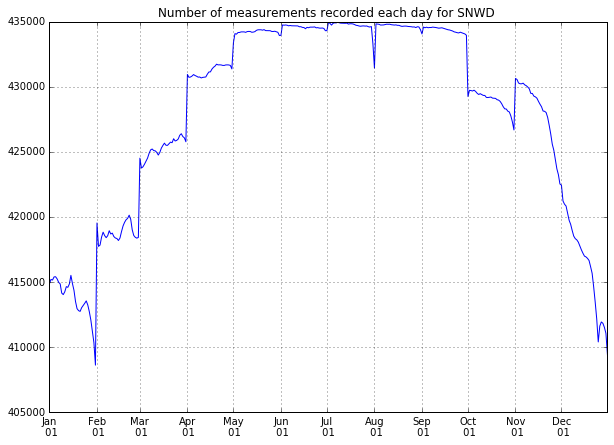

In [128]:
## Your code here

YearlyPlots(STAT['SNWD']['NE'], ttl = "Number of measurements recorded each day for SNWD ")

### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

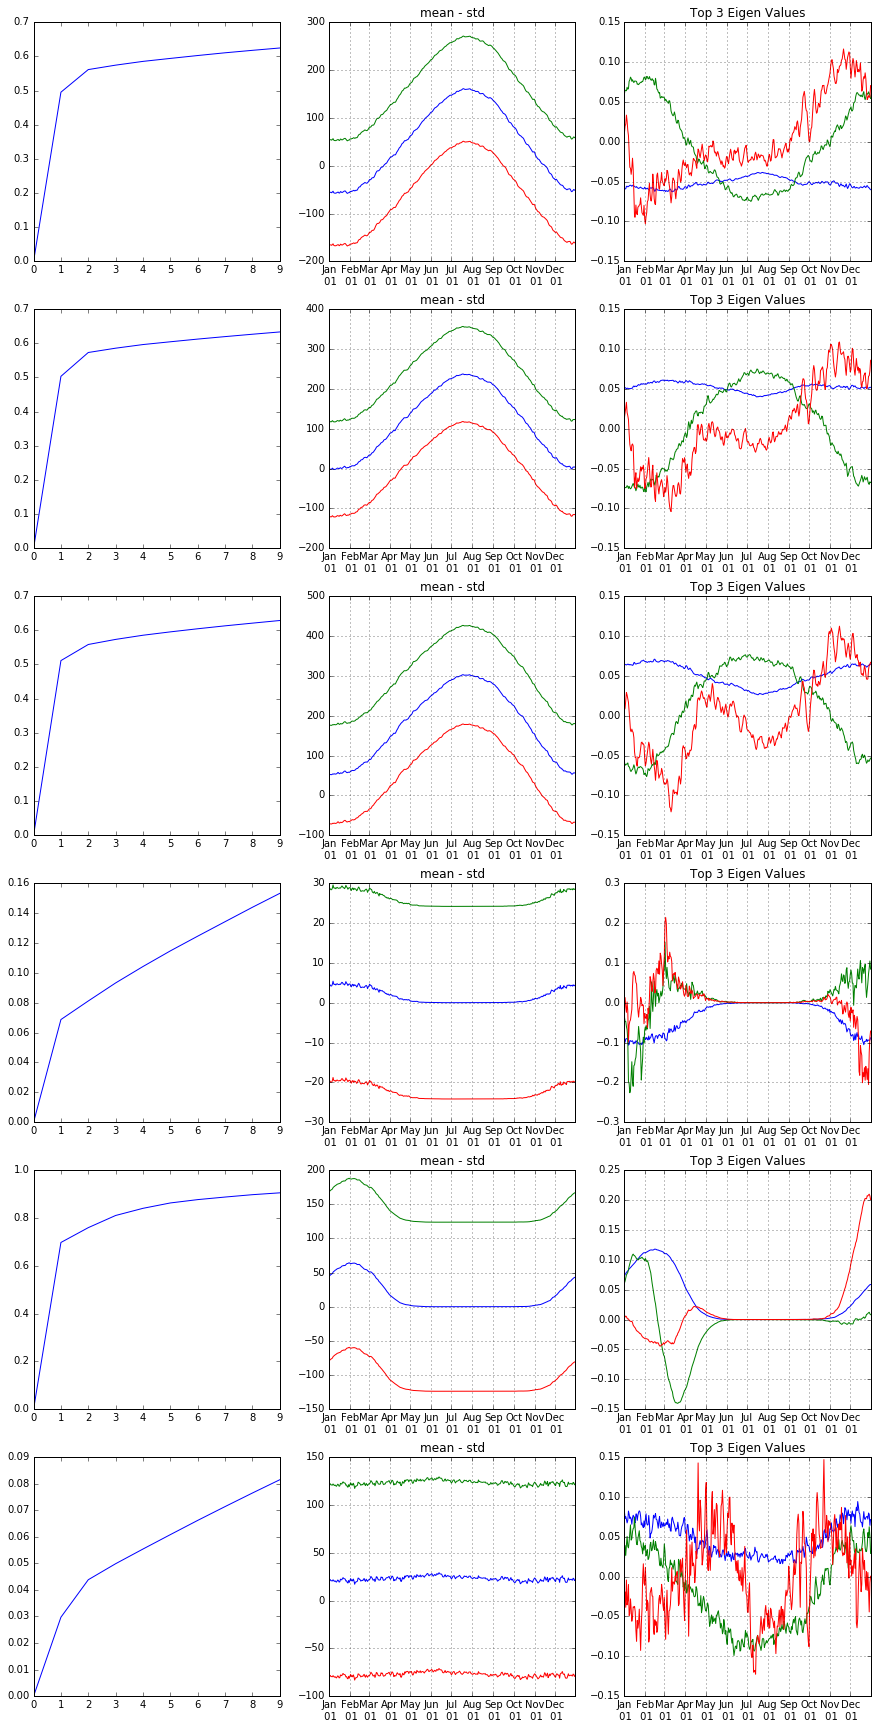

In [14]:
figure(figsize=(15,30))
offset=1

for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    var_explained  = np.sort(STAT[meas]['eigval'])[::-1].cumsum()/STAT[meas]['eigval'].sum()
    plt.plot(range(10),  [0] + var_explained[:9].tolist())
    
    subplot(6,3,offset)
    offset+=1
    
    ## Your code for mean and mean +- std
    
    YearlyPlots(STAT[meas]['Mean'], ttl = "Mean")
    YearlyPlots(STAT[meas]['Mean'] + STAT[meas]['std'], ttl = "mean + std")
    YearlyPlots(STAT[meas]['Mean'] - STAT[meas]['std'], ttl = "mean - std")
    
    subplot(6,3,offset)
    offset+=1

##  Your code for top-3 eigenvectors
    #   numpy.argsort(a, axis=-1, kind='quicksort', order=None)[source]
    #   Returns the indices that would sort an array.
    
    index_of_top_eig_vec = STAT[meas]['eigval'].argsort()[-3:][::-1]
    
    YearlyPlots(STAT[meas]['eigvec'][:,index_of_top_eig_vec], ttl = "Top 3 Eigen Values")